In [1]:
import pandas as pd
import numpy as np
from time import ctime

chemicals = pd.read_csv('chemicals_clean.csv').drop(columns = 'Unnamed: 0')

In [2]:
properties = pd.concat([pd.read_excel(open("C:/Users/Simone/Desktop/Utilità Tesi Magistrale/data/DSSToxQueryWPred1.xlsx", 'rb'),
                  usecols =  ['Substance_CASRN', 'Structure_SMILES', 'NCCT_MP', 'NCCT_WS'], engine = 'openpyxl'),
                  pd.read_excel(open("C:/Users/Simone/Desktop/Utilità Tesi Magistrale/data/DSSToxQueryWPred2.xlsx", 'rb'),
                  usecols =  ['Substance_CASRN', 'Structure_SMILES', 'NCCT_MP', 'NCCT_WS'], engine = 'openpyxl'),
                  pd.read_excel(open("C:/Users/Simone/Desktop/Utilità Tesi Magistrale/data/DSSToxQueryWPred3.xlsx", 'rb'),
                  usecols =  ['Substance_CASRN', 'Structure_SMILES', 'NCCT_MP', 'NCCT_WS'], engine = 'openpyxl'),
                  pd.read_excel(open("C:/Users/Simone/Desktop/Utilità Tesi Magistrale/data/DSSToxQueryWPred4.xlsx", 'rb'),
                  usecols =  ['Substance_CASRN', 'Structure_SMILES', 'NCCT_MP', 'NCCT_WS'], engine = 'openpyxl')], axis = 0)

chemicals = chemicals.merge(prop, left_on = 'test_cas', right_on = 'Substance_CASRN')
chemicals.drop(index = chemicals[chemicals.isnull().any(axis = 1)].index, inplace = True)
chemicals.rename(columns = {'NCCT_MP': 'MeltingPoint', 'NCCT_WS': 'WaterSolubility'}, inplace = True)

ValueError: Usecols do not match columns, columns expected but not found: ['Substance_SMILES']

In [75]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = 'box-cox')

pt.fit(chemicals.WaterSolubility.values.reshape(-1, 1))
pt.transform(chemicals.WaterSolubility.values.reshape(-1, 1))

array([[ 1.95994011],
       [-0.06652033],
       [-2.14864487],
       ...,
       [-0.80777871],
       [-0.21767275],
       [ 0.74453621]])

In [84]:
chemicals[['WaterSolubility']] = pt.transform(chemicals.WaterSolubility.values.reshape(-1, 1)).ravel()

In [4]:
chemicals

,test_cas,smiles,pubchem2d,atom_number,alone_atom_number,bonds_number,doubleBond,tripleBond,ring_number,Mol,MorganDensity,LogP,oh_count
0,50-00-0,C=O,0000000000000000001000000000000000000000000000...,0.217006,0,0.141094,1,0,0,0.219354,1.500000,-0.1849,0
1,50-06-6,CCC1(C(=O)NC(=O)NC1=O)c2ccccc2,1100000001110011001100000000000000000000000000...,0.490837,0,0.599358,3,0,2,0.610577,1.000000,0.7004,0
2,50-29-3,Clc1ccc(cc1)C(c2ccc(Cl)cc2)C(Cl)(Cl)Cl,1100000001110000000000000000000000000111000000...,0.410746,0,0.619731,0,0,2,0.692310,0.631579,6.4955,0
3,50-31-7,OC(=O)c1c(Cl)ccc(Cl)c1Cl,0000000001100000001100000000000000000110000000...,0.384370,0,0.522111,1,0,1,0.604855,1.166667,3.3450,1
4,51-03-6,CCCCOCCOCCOCc1cc2OCOc2cc1CCC,1110000001111000001110000000000000000000000000...,0.581607,0,0.663205,0,0,2,0.683352,0.791667,3.7177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2684,18268-76-3,COc1cc(C=O)c(Cl)cc1O,1000000001110000001100000000000000000100000000...,0.384370,0,0.522111,1,0,1,0.568340,1.583333,1.8667,1
2685,51312-24-4,[Cl-].[Hg+],0000000000000000000000000000000000000100000000...,0.217006,2,0.000000,0,0,0,0.613714,1.000000,-2.9985,0
2686,8015-35-8,OC(=O)COc1ccc(Cl)cc1Cl.OC(=O)COc2cc(Cl)c(Cl)cc2Cl,1100000001111000001110000000000000000111000000...,0.547662,0,0.678290,2,0,2,0.749544,0.703704,5.5670,2
2687,77458-01-6,CCCS[P](=O)(OCC)Oc1cnn(c1)c2ccc(Cl)cc2,1110000001110011001100000000001001000100000000...,0.490837,1,0.646912,1,0,2,0.695724,1.318182,5.1923,0


In [4]:
import pandas as pd
import numpy as np


db = pd.read_csv('repeated_experiments.csv').drop(columns = 'Unnamed: 0')
db

,test_cas,obs_duration_mean,conc1_type,fish,exposure_type,control_type,media_type,application_freq_unit,conc1_mean,class,tax_order,family,genus,species
0,50-00-0,24.0,A,Actinopterygii Cypriniformes Cyprinidae Pimeph...,F,C,FW,CON,42.500,Actinopterygii,Cypriniformes,Cyprinidae,Pimephales,promelas
1,50-00-0,48.0,A,Actinopterygii Cypriniformes Cyprinidae Pimeph...,F,C,FW,CON,27.500,Actinopterygii,Cypriniformes,Cyprinidae,Pimephales,promelas
2,50-00-0,96.0,A,Actinopterygii Cypriniformes Cyprinidae Pimeph...,F,C,FW,CON,24.300,Actinopterygii,Cypriniformes,Cyprinidae,Pimephales,promelas
3,50-00-0,96.0,A,Actinopterygii Cypriniformes Cyprinidae Pimeph...,S,C,FW,X,26.300,Actinopterygii,Cypriniformes,Cyprinidae,Pimephales,promelas
4,50-06-6,96.0,A,Actinopterygii Cypriniformes Cyprinidae Pimeph...,F,S,FW,CON,484.000,Actinopterygii,Cypriniformes,Cyprinidae,Pimephales,promelas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28810,77458-01-6,48.0,A,Actinopterygii Siluriformes Bagridae Chrysicht...,R,I,FW,X,0.078,Actinopterygii,Siluriformes,Bagridae,Chrysichthys,nigrodigitatus
28811,77458-01-6,48.0,A,Actinopterygii Siluriformes Bagridae Chrysicht...,R,S,FW,X,0.078,Actinopterygii,Siluriformes,Bagridae,Chrysichthys,nigrodigitatus
28812,77458-01-6,72.0,A,Actinopterygii Siluriformes Bagridae Chrysicht...,R,I,FW,X,0.068,Actinopterygii,Siluriformes,Bagridae,Chrysichthys,nigrodigitatus
28813,77458-01-6,72.0,A,Actinopterygii Siluriformes Bagridae Chrysicht...,R,S,FW,X,0.068,Actinopterygii,Siluriformes,Bagridae,Chrysichthys,nigrodigitatus


In [45]:
import pandas as pd
import numpy as np

db = pd.read_csv('lc_db_processed.csv')[['test_cas', 'conc1_mean', 'fish']]
db['conc1_mean'] = np.where(db['conc1_mean'] > 1, 0, 1)

In [46]:
lst = list()
lst_cas = list()
for tc in db.test_cas.unique():
#     print(tc)
    tmp = db['conc1_mean'][db.test_cas == tc]
    try:
        lst.append(tmp.value_counts()[1]/len(tmp))
        lst_cas.append(tc)
    except:
        continue

<BarContainer object of 100 artists>

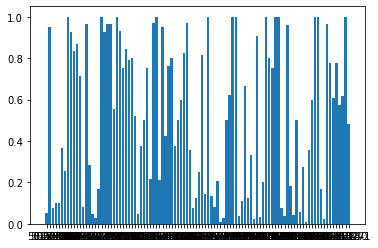

In [15]:
import matplotlib.pyplot as plt
plt.bar(lst_cas[:100], lst[:100])

In [47]:
a = pd.DataFrame({'test_cas': lst_cas, 'frac_tox': lst})

<BarContainer object of 691 artists>

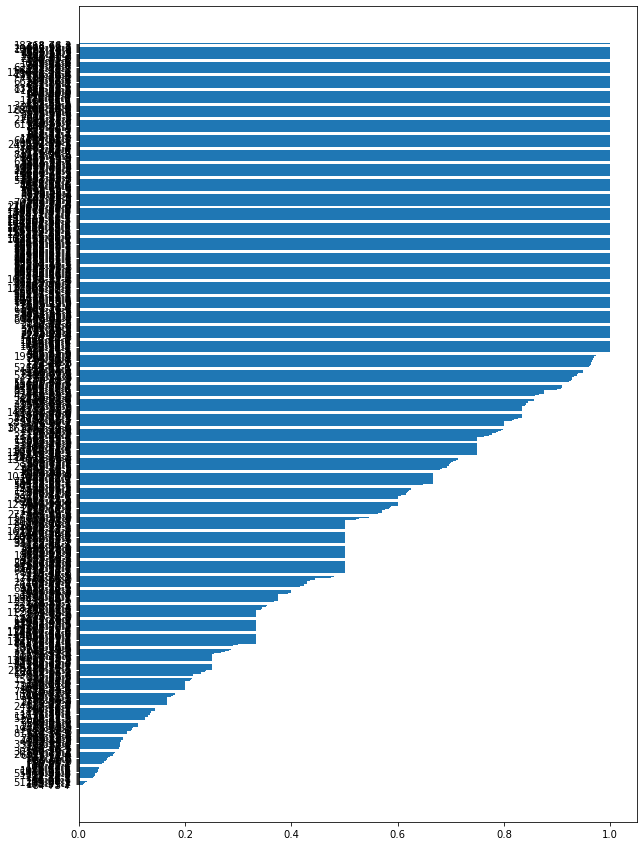

In [49]:
a = a.sort_values('frac_tox')
plt.figure(figsize = (10,15))
plt.barh(a['test_cas'], a['frac_tox'])

In [53]:
import pandas as pd
import numpy as np

db = pd.read_csv('lc_db_processed.csv')[['test_cas', 'conc1_mean', 'fish']]
db = db.groupby(['test_cas', 'fish']).agg('median').reset_index()
db['conc1_mean'] = np.where(db['conc1_mean'] > 1, 0, 1)

In [56]:
lst = list()
lst_cas = list()
for tc in db.test_cas.unique():
    tmp = db['conc1_mean'][db.test_cas == tc]
    try:
        lst.append(tmp.value_counts()[1]/len(tmp))
        lst_cas.append(tc)
    except:
        continue

<BarContainer object of 10 artists>

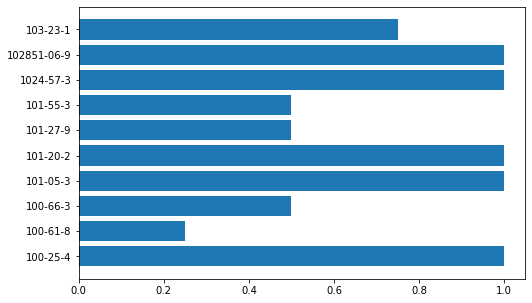

In [65]:
import matplotlib.pyplot as plt
plt.figure(figsize = (8,5))
plt.barh(lst_cas[:10], lst[:10])

In [64]:
db[db.test_cas == '100-25-4']

,test_cas,fish,conc1_mean
22,100-25-4,Actinopterygii Cypriniformes Cyprinidae Cyprin...,1
23,100-25-4,Actinopterygii Cypriniformes Cyprinidae Pimeph...,1
24,100-25-4,Actinopterygii Siluriformes Ictaluridae Ictalu...,1
